In [1]:
%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
#objects
class player(object):
    #Player object with a few parameters and a function for dynamics.
    def __init__(self, start_pos, start_velocity):
        self.r = array(start_pos).astype(float)
        self.v = array(start_velocity).astype(float)

    def get_a(self, playa):
        #Takes another player. Returns the acceleration vector on self due to gravity.
        r = self.r - playa.r
        if count_nonzero(r) is 0: #trying to compare same player
            return 0
        r_mag = (linalg.norm(r))

        F = (G / r_mag**3) * -r  #attractive force
        F += (C / r_mag**4) * r   #repulsive force
        a = F
        return a
    
    def update(self, a):
        #Takes acceleration and updates position
        self.v += a*dt
        self.r += self.v*dt

In [3]:
def bork_check(players):
    #check if it borked
    borked = False
    for player in players:
        position = player.r
        if not position.any():
            borked = True
        
        for coord in position:
            if abs(coord) > 200:
                borked = True
    return borked

Initialize
===

In [40]:
#constants
dims = [100, 100]
G = 5e6
C = 1e7
dt = 1e-5
duration = 0.1

#start conditions
players=[]

r = 15.0
thetas = linspace(0, 2*pi-2*pi/20, 20)

for theta in thetas:
    players.append(player(start_pos=[50+r*cos(theta), 50+ r*sin(theta)], start_velocity=[-100*r*sin(theta), 100*r*cos(theta)]))


#initialize
borked = False
data = []
t=0
ndx = 0

Main Loop
===

In [41]:
#main loop
n_data = 10

print('starting sim with duration = ' + str(duration) + ' and dt = %.5f' %dt)
print('initial number of players = %d' % len(players))
start_time = time.time()

abs_max_x=players[0].r[0]; abs_max_y=players[0].r[1]
abs_min_x=players[0].r[0]; abs_min_y=players[0].r[1]

for i in arange(0, duration, dt):
    for playa in players:
        #dynamics
        a = 0
        #update with the superposition of forces from each other player
        for playo in players:
            a += playa.get_a(playo)
        playa.update(a)
        
    if ndx % n_data is 0: 
        #end sim if a player escapes
        if bork_check(players):
            duration = t
            players.remove(playa)
            print('player borked at t = %.2f' %t )

        #logging
        player_positions = [[playa.r[0], playa.r[1]] for playa in players]
        data.append(player_positions)

    t+=dt
    ndx+=1

    #print progress
    if t % .001 < dt:
        print('t = ' + str((t)))

end_time = time.time()
compute_time = int(end_time - start_time)
print('sim finished in %i seconds' % compute_time)

starting sim with duration = 0.1 and dt = 0.00001
initial number of players = 20
t = 0.001000000000000002
t = 0.0020000000000000044
t = 0.003000000000000007
t = 0.004000000000000005
t = 0.005009999999999964
t = 0.006009999999999923
t = 0.007009999999999883
t = 0.008009999999999842
t = 0.009009999999999801
t = 0.01000999999999976
t = 0.01100999999999972
t = 0.012009999999999679
t = 0.013009999999999638
t = 0.014009999999999597
t = 0.015009999999999557
t = 0.016009999999999518
t = 0.017009999999999477
t = 0.018009999999999436
t = 0.019009999999999395
t = 0.020009999999999355
t = 0.021009999999999314
t = 0.022009999999999273
t = 0.023009999999999232
t = 0.02400999999999919
t = 0.02500999999999915
t = 0.02600999999999911
t = 0.02700999999999907
t = 0.02800999999999903
t = 0.029009999999998988
t = 0.030009999999998947
t = 0.031009999999998906
t = 0.03200999999999913
t = 0.033009999999999436
t = 0.03400999999999974
t = 0.035000000000000045
t = 0.03600000000000035
t = 0.03700000000000066
t = 

KeyboardInterrupt: 

0 / 515
5 / 515
10 / 515
15 / 515
20 / 515
25 / 515
30 / 515
35 / 515
40 / 515
45 / 515
50 / 515
55 / 515
60 / 515
65 / 515
70 / 515
75 / 515
80 / 515
85 / 515
90 / 515
95 / 515
100 / 515
105 / 515
110 / 515
115 / 515
120 / 515
125 / 515
130 / 515
135 / 515
140 / 515
145 / 515
150 / 515
155 / 515
160 / 515
165 / 515
170 / 515
175 / 515
180 / 515
185 / 515
190 / 515
195 / 515
200 / 515
205 / 515
210 / 515
215 / 515
220 / 515
225 / 515
230 / 515
235 / 515
240 / 515
245 / 515
250 / 515
255 / 515
260 / 515
265 / 515
270 / 515
275 / 515
280 / 515
285 / 515
290 / 515
295 / 515
300 / 515
305 / 515
310 / 515
315 / 515
320 / 515
325 / 515
330 / 515
335 / 515
340 / 515
345 / 515
350 / 515
355 / 515
360 / 515
365 / 515
370 / 515
375 / 515
380 / 515
385 / 515
390 / 515
395 / 515
400 / 515
405 / 515
410 / 515
415 / 515
420 / 515
425 / 515
430 / 515
435 / 515
440 / 515
445 / 515
450 / 515
455 / 515
460 / 515
465 / 515
470 / 515
475 / 515
480 / 515
485 / 515
490 / 515
495 / 515
500 / 515
505 / 515
51

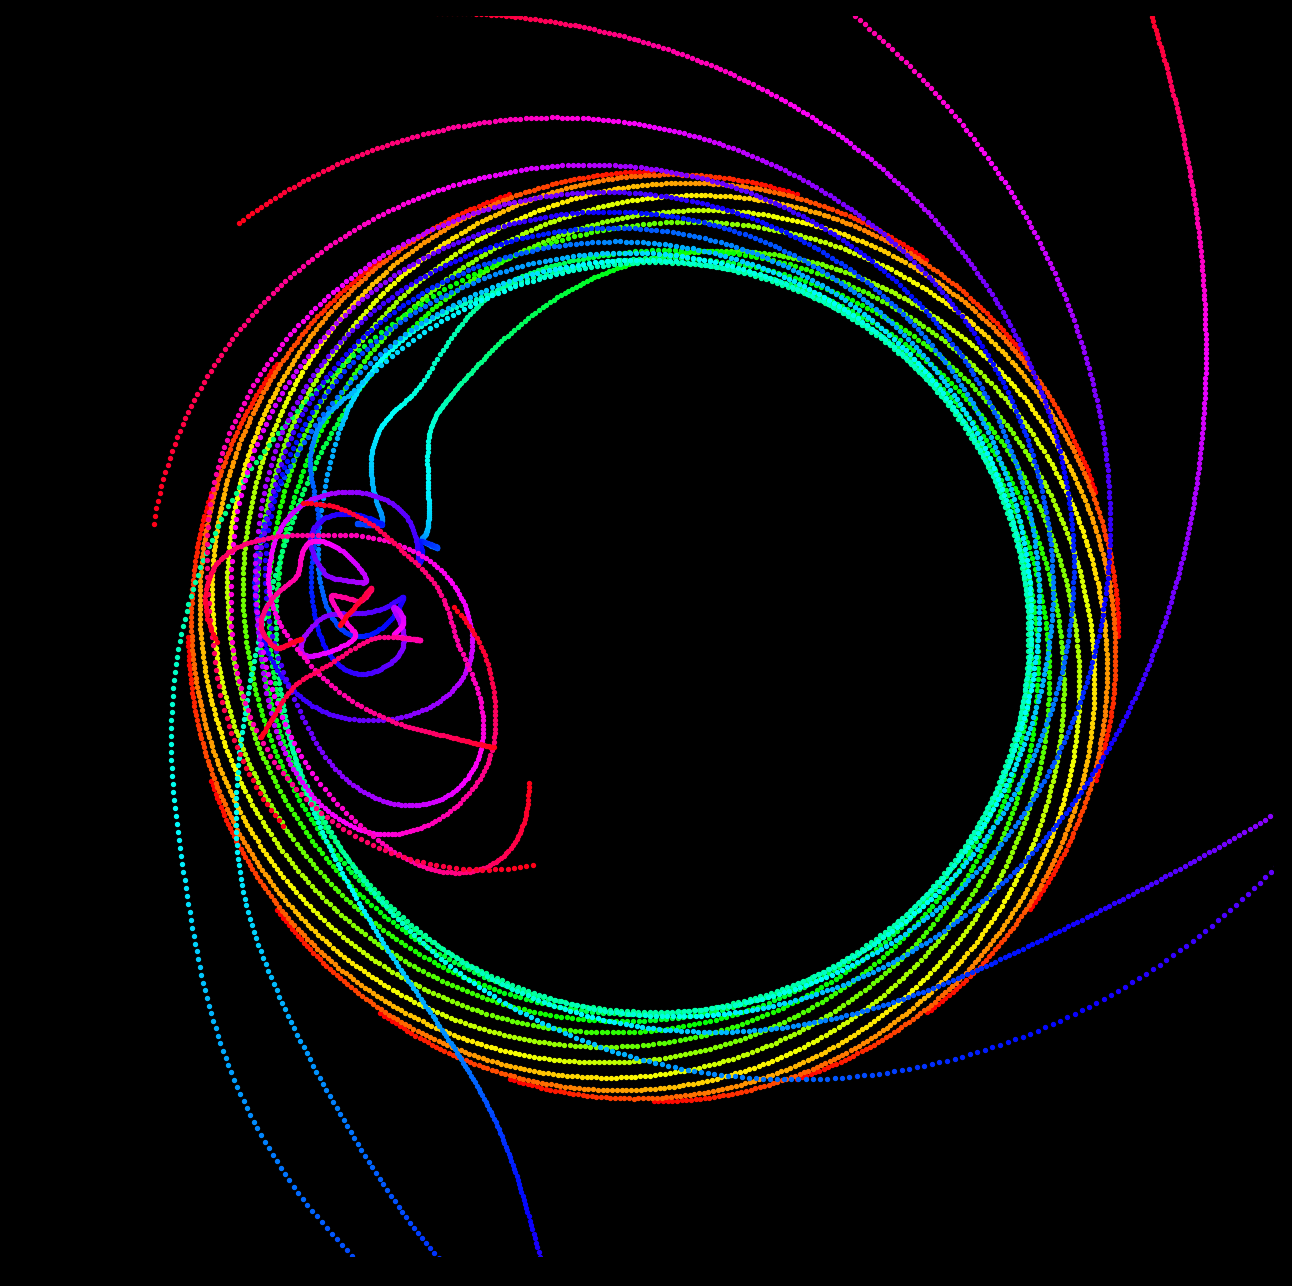

In [43]:
fig = figure(figsize=[16,16], dpi=300, facecolor='black')
axis('off')
#draw_gravs(gravs)

alphas = iter(linspace(1,0, len(data)+1))
colors = iter(cm.hsv(linspace(0, 1, len(data)+1)))
ndx = 0
for entry in data: 
    colour = next(colors)
    a = next(alphas)
    for playerloc in entry:
        scatter(playerloc[0], playerloc[1], color=colour, s=8)#, alpha=a)
    
    if ndx %5 is 0:
        print(str(ndx) + ' / ' + str(len(data)))
    if ndx %5 is 0:
        im = fig

        im.savefig("gravyteez/" + str(ndx) + ".png", bbox_inches='tight', facecolor='black', edgecolor = 'white', pad_inches=.25)
    ndx+=1
    
xlim(30, 70)
ylim(30, 70)
show()